In [ ]:
import tensorflow as tf

from tensorflow.keras import layers

In [ ]:
model = tf.keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

In [ ]:
import collections
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras import layers

In [ ]:
model = tf.keras.Sequential()

model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), 
                               input_shape=(5, 10)))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))

model.summary()

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os
import cv2
import numpy as np

directory = 'horseGallop'
width = 256
height = 256
images = np.empty(shape=(0, height, width, 3), dtype='uint8')
for i in range(0, len(os.listdir(directory))):
    image = cv2.imread(directory + '/' + os.listdir(directory)[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (height, width))
    images = np.append(images, [image/255], axis=0)
print(images.shape)

(15, 256, 256, 3)


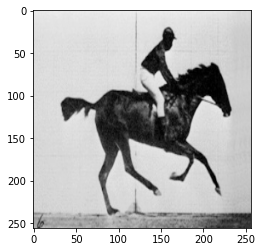

In [3]:
plt.imshow(images[0])

In [4]:
from keras.applications import VGG16
from keras import Input, Model
from keras.layers import Flatten


def get_model(h, w):
    c_m = VGG16(weights='imagenet', include_top=False)
    custom_input = Input(shape=(h, w, 3), name='image_input')
    convolutional_input = c_m(custom_input)
    x = Flatten(name='flatten')(convolutional_input)
    my_model = Model(input=custom_input, output=x)
    return my_model


convolution_model = get_model(height, width)

Using TensorFlow backend.
-c:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("fl...)`


In [5]:
print(convolution_model.predict(np.array([images[0]])).shape)

(1, 32768)


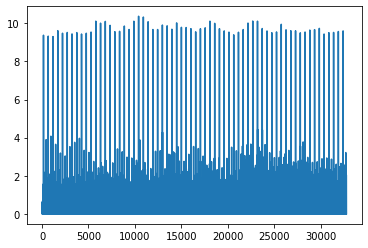

In [6]:
pred = convolution_model.predict(np.array([images[0]]))[0]
import matplotlib.pyplot as plt
plt.plot(pred)
plt.show()

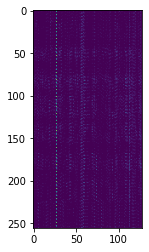

In [12]:
# pred.shape[0].reshape(256,128)

plt.imshow(pred.reshape(256,128))

In [13]:
convoluted_array = np.empty(shape=(0, 32768))
for j in range(0, len(images)):
    pred = convolution_model.predict(np.array([images[j]]))
    convoluted_array = np.append(convoluted_array, pred, axis=0)
print(convoluted_array.shape)

(15, 32768)


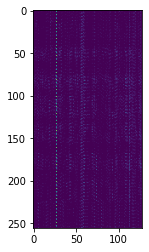

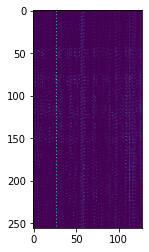

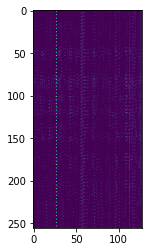

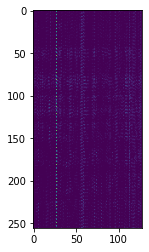

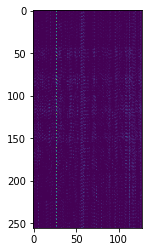

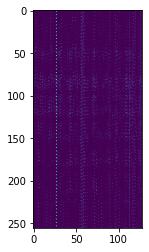

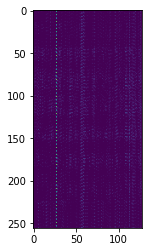

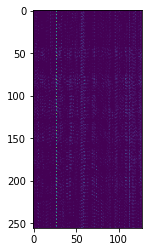

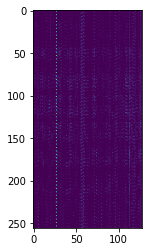

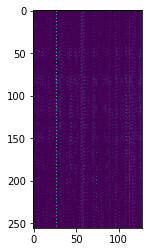

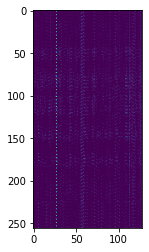

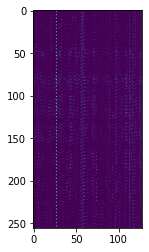

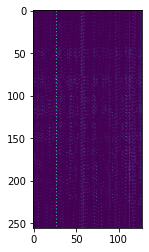

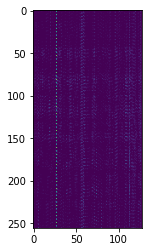

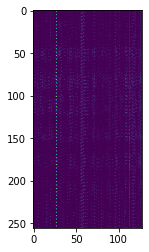

In [15]:
for j in range(convoluted_array.shape[0]):
    plt.imshow(convoluted_array[j].reshape(256,128))
    plt.show()

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.99)
pca.fit(convoluted_array)
print(pca.n_components_)

14


In [18]:
decomposed_array = pca.transform(convoluted_array)
print(decomposed_array.shape)

(15, 14)


In [34]:
max_length = 15 #8
# n_features = n_comp
n_features = pca.n_components_
X = np.empty(shape=(0, max_length, n_features))
y = np.empty(shape=(0, n_features))
c = 0

In [35]:
def pad_seq(im_seq, max_len):
    empty = np.zeros(im_seq[0].shape)
    result = []
    ep = [empty] * (max_len - len(im_seq))
    for i in range(0, len(ep)):
        result.append(ep[i])
    for i in range(0, len(im_seq)):
        result.append(im_seq[i])
    return np.array(result, dtype='float64')

In [36]:
X.shape

(0, 15, 14)

In [37]:
for i in range(0, len(decomposed_array) - 1):
    inp = decomposed_array[0:c + 1]
    inp = pad_seq(inp, max_length)
    target = decomposed_array[c + 1]
    X = np.append(X, [inp], axis=0)
    y = np.append(y, [target], axis=0)
    c += 1
print(X.shape)
print(y.shape)

(14, 15, 14)
(14, 14)


Train on 11 samples, validate on 3 samples
Epoch 1/3000
11/11 [==============================] - 1s 70ms/step - loss: 57.0003 - val_loss: 55.5343
Epoch 2/3000
11/11 [==============================] - 0s 1ms/step - loss: 56.8958 - val_loss: 55.5336
Epoch 3/3000
11/11 [==============================] - 0s 2ms/step - loss: 57.0127 - val_loss: 55.5334
Epoch 4/3000
11/11 [==============================] - 0s 826us/step - loss: 57.1242 - val_loss: 55.5317
Epoch 5/3000
11/11 [==============================] - 0s 1ms/step - loss: 56.9116 - val_loss: 55.5291
Epoch 6/3000
11/11 [==============================] - 0s 1ms/step - loss: 56.9186 - val_loss: 55.5278
Epoch 7/3000
11/11 [==============================] - 0s 1ms/step - loss: 57.0813 - val_loss: 55.5256
Epoch 8/3000
11/11 [==============================] - 0s 2ms/step - loss: 56.8993 - val_loss: 55.5237
Epoch 9/3000
11/11 [==============================] - 0s 2ms/step - loss: 56.8525 - val_loss: 55.5219
Epoch 10/3000
11/11 [===============

Epoch 81/3000
11/11 [==============================] - 0s 2ms/step - loss: 56.3042 - val_loss: 55.4798
Epoch 82/3000
11/11 [==============================] - 0s 2ms/step - loss: 56.3328 - val_loss: 55.4787
Epoch 83/3000
11/11 [==============================] - 0s 2ms/step - loss: 56.5103 - val_loss: 55.4773
Epoch 84/3000
11/11 [==============================] - 0s 2ms/step - loss: 56.3367 - val_loss: 55.4757
Epoch 85/3000
11/11 [==============================] - 0s 2ms/step - loss: 56.3309 - val_loss: 55.4740
Epoch 86/3000
11/11 [==============================] - 0s 2ms/step - loss: 56.2975 - val_loss: 55.4714
Epoch 87/3000
11/11 [==============================] - 0s 2ms/step - loss: 56.4041 - val_loss: 55.4676
Epoch 88/3000
11/11 [==============================] - 0s 2ms/step - loss: 56.4296 - val_loss: 55.4637
Epoch 89/3000
11/11 [==============================] - 0s 2ms/step - loss: 56.4169 - val_loss: 55.4600
Epoch 90/3000
11/11 [==============================] - 0s 2ms/step - loss

Epoch 160/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.6935 - val_loss: 55.4256
Epoch 161/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.7904 - val_loss: 55.4255
Epoch 162/3000
11/11 [==============================] - 0s 3ms/step - loss: 55.9718 - val_loss: 55.4251
Epoch 163/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.6754 - val_loss: 55.4247
Epoch 164/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.6400 - val_loss: 55.4245
Epoch 165/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.6654 - val_loss: 55.4239
Epoch 166/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.6746 - val_loss: 55.4238
Epoch 167/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.9435 - val_loss: 55.4236
Epoch 168/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.7013 - val_loss: 55.4229
Epoch 169/3000
11/11 [==============================] - 0s 2ms/s

Epoch 239/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.1501 - val_loss: 55.4315
Epoch 240/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.2007 - val_loss: 55.4330
Epoch 241/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.0940 - val_loss: 55.4345
Epoch 242/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.0943 - val_loss: 55.4363
Epoch 243/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.9946 - val_loss: 55.4378
Epoch 244/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.0739 - val_loss: 55.4392
Epoch 245/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.1686 - val_loss: 55.4404
Epoch 246/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.9990 - val_loss: 55.4416
Epoch 247/3000
11/11 [==============================] - 0s 2ms/step - loss: 55.0843 - val_loss: 55.4428
Epoch 248/3000
11/11 [==============================] - 0s 2ms/s

Epoch 318/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.6377 - val_loss: 55.4699
Epoch 319/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.5966 - val_loss: 55.4708
Epoch 320/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.6945 - val_loss: 55.4714
Epoch 321/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.6118 - val_loss: 55.4720
Epoch 322/3000
11/11 [==============================] - 0s 3ms/step - loss: 54.5705 - val_loss: 55.4731
Epoch 323/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.5677 - val_loss: 55.4743
Epoch 324/3000
11/11 [==============================] - 0s 3ms/step - loss: 54.6017 - val_loss: 55.4751
Epoch 325/3000
11/11 [==============================] - 0s 1ms/step - loss: 54.5734 - val_loss: 55.4758
Epoch 326/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.5657 - val_loss: 55.4764
Epoch 327/3000
11/11 [==============================] - 0s 2ms/s

Epoch 397/3000
11/11 [==============================] - 0s 3ms/step - loss: 54.1346 - val_loss: 55.4885
Epoch 398/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.0430 - val_loss: 55.4882
Epoch 399/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.0829 - val_loss: 55.4883
Epoch 400/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.1101 - val_loss: 55.4883
Epoch 401/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.1488 - val_loss: 55.4885
Epoch 402/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.1482 - val_loss: 55.4886
Epoch 403/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.1954 - val_loss: 55.4890
Epoch 404/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.1352 - val_loss: 55.4891
Epoch 405/3000
11/11 [==============================] - 0s 2ms/step - loss: 54.1134 - val_loss: 55.4893
Epoch 406/3000
11/11 [==============================] - 0s 2ms/s

Epoch 476/3000
11/11 [==============================] - 0s 3ms/step - loss: 53.8512 - val_loss: 55.5199
Epoch 477/3000
11/11 [==============================] - 0s 3ms/step - loss: 53.9339 - val_loss: 55.5211
Epoch 478/3000
11/11 [==============================] - 0s 3ms/step - loss: 53.9227 - val_loss: 55.5225
Epoch 479/3000
11/11 [==============================] - 0s 2ms/step - loss: 53.8250 - val_loss: 55.5238
Epoch 480/3000
11/11 [==============================] - 0s 3ms/step - loss: 53.8343 - val_loss: 55.5245
Epoch 481/3000
11/11 [==============================] - 0s 2ms/step - loss: 53.7685 - val_loss: 55.5252
Epoch 482/3000
11/11 [==============================] - 0s 2ms/step - loss: 53.7848 - val_loss: 55.5258
Epoch 483/3000
11/11 [==============================] - 0s 3ms/step - loss: 53.7838 - val_loss: 55.5263
Epoch 484/3000
11/11 [==============================] - 0s 3ms/step - loss: 53.7973 - val_loss: 55.5267
Epoch 485/3000
11/11 [==============================] - 0s 2ms/s

Epoch 555/3000
11/11 [==============================] - 0s 3ms/step - loss: 53.5418 - val_loss: 55.5311
Epoch 556/3000
11/11 [==============================] - 0s 3ms/step - loss: 53.5747 - val_loss: 55.5315
Epoch 557/3000
11/11 [==============================] - 0s 2ms/step - loss: 53.5110 - val_loss: 55.5316
Epoch 558/3000
11/11 [==============================] - 0s 2ms/step - loss: 53.5350 - val_loss: 55.5319
Epoch 559/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.5490 - val_loss: 55.5323
Epoch 560/3000
11/11 [==============================] - 0s 2ms/step - loss: 53.4793 - val_loss: 55.5322
Epoch 561/3000
11/11 [==============================] - 0s 2ms/step - loss: 53.4495 - val_loss: 55.5321
Epoch 562/3000
11/11 [==============================] - 0s 2ms/step - loss: 53.6431 - val_loss: 55.5316
Epoch 563/3000
11/11 [==============================] - 0s 2ms/step - loss: 53.7139 - val_loss: 55.5304
Epoch 564/3000
11/11 [==============================] - 0s 2ms/s

Epoch 634/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.3448 - val_loss: 55.4983
Epoch 635/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.2666 - val_loss: 55.4984
Epoch 636/3000
11/11 [==============================] - 0s 950us/step - loss: 53.2771 - val_loss: 55.4982
Epoch 637/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.2499 - val_loss: 55.4981
Epoch 638/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.3827 - val_loss: 55.4977
Epoch 639/3000
11/11 [==============================] - 0s 997us/step - loss: 53.4214 - val_loss: 55.4971
Epoch 640/3000
11/11 [==============================] - 0s 978us/step - loss: 53.3252 - val_loss: 55.4968
Epoch 641/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.1954 - val_loss: 55.4969
Epoch 642/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.3291 - val_loss: 55.4974
Epoch 643/3000
11/11 [==============================] - 0s

Epoch 713/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.0231 - val_loss: 55.5020
Epoch 714/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.0388 - val_loss: 55.5025
Epoch 715/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.1502 - val_loss: 55.5033
Epoch 716/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.0566 - val_loss: 55.5039
Epoch 717/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.1785 - val_loss: 55.5047
Epoch 718/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.0032 - val_loss: 55.5057
Epoch 719/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.1624 - val_loss: 55.5065
Epoch 720/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.9585 - val_loss: 55.5073
Epoch 721/3000
11/11 [==============================] - 0s 1ms/step - loss: 53.1017 - val_loss: 55.5083
Epoch 722/3000
11/11 [==============================] - 0s 1ms/s

Epoch 792/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.9074 - val_loss: 55.5059
Epoch 793/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.8396 - val_loss: 55.5057
Epoch 794/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.8337 - val_loss: 55.5055
Epoch 795/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.9333 - val_loss: 55.5056
Epoch 796/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.8332 - val_loss: 55.5058
Epoch 797/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.8617 - val_loss: 55.5061
Epoch 798/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.8879 - val_loss: 55.5061
Epoch 799/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.9184 - val_loss: 55.5062
Epoch 800/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.9690 - val_loss: 55.5063
Epoch 801/3000
11/11 [==============================] - 0s 1ms/s

Epoch 871/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.7492 - val_loss: 55.4986
Epoch 872/3000
11/11 [==============================] - 0s 3ms/step - loss: 52.8117 - val_loss: 55.4986
Epoch 873/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.7536 - val_loss: 55.4990
Epoch 874/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.6543 - val_loss: 55.4993
Epoch 875/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.6811 - val_loss: 55.4999
Epoch 876/3000
11/11 [==============================] - 0s 3ms/step - loss: 52.7670 - val_loss: 55.5001
Epoch 877/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.6337 - val_loss: 55.5002
Epoch 878/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.7687 - val_loss: 55.5003
Epoch 879/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.7546 - val_loss: 55.5006
Epoch 880/3000
11/11 [==============================] - 0s 2ms/s

Epoch 950/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.6666 - val_loss: 55.5339
Epoch 951/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.5249 - val_loss: 55.5342
Epoch 952/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.5686 - val_loss: 55.5346
Epoch 953/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.4943 - val_loss: 55.5349
Epoch 954/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.5945 - val_loss: 55.5351
Epoch 955/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.5664 - val_loss: 55.5350
Epoch 956/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.4918 - val_loss: 55.5351
Epoch 957/3000
11/11 [==============================] - 0s 3ms/step - loss: 52.5748 - val_loss: 55.5351
Epoch 958/3000
11/11 [==============================] - 0s 3ms/step - loss: 52.5470 - val_loss: 55.5349
Epoch 959/3000
11/11 [==============================] - 0s 2ms/s

Epoch 1029/3000
11/11 [==============================] - 0s 3ms/step - loss: 52.4329 - val_loss: 55.5429
Epoch 1030/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.4667 - val_loss: 55.5431
Epoch 1031/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.4175 - val_loss: 55.5430
Epoch 1032/3000
11/11 [==============================] - 0s 3ms/step - loss: 52.3733 - val_loss: 55.5431
Epoch 1033/3000
11/11 [==============================] - 0s 3ms/step - loss: 52.3960 - val_loss: 55.5432
Epoch 1034/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.3696 - val_loss: 55.5433
Epoch 1035/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.3949 - val_loss: 55.5427
Epoch 1036/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.3716 - val_loss: 55.5421
Epoch 1037/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.4474 - val_loss: 55.5418
Epoch 1038/3000
11/11 [==============================] 

Epoch 1107/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.2797 - val_loss: 55.5501
Epoch 1108/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.2926 - val_loss: 55.5499
Epoch 1109/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.3017 - val_loss: 55.5493
Epoch 1110/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.3155 - val_loss: 55.5483
Epoch 1111/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.2618 - val_loss: 55.5472
Epoch 1112/3000
11/11 [==============================] - 0s 2ms/step - loss: 52.2811 - val_loss: 55.5463
Epoch 1113/3000
11/11 [==============================] - 0s 890us/step - loss: 52.2488 - val_loss: 55.5451
Epoch 1114/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.3964 - val_loss: 55.5429
Epoch 1115/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.3671 - val_loss: 55.5410
Epoch 1116/3000
11/11 [==============================

Epoch 1185/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.2881 - val_loss: 55.5212
Epoch 1186/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.2591 - val_loss: 55.5211
Epoch 1187/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.1760 - val_loss: 55.5210
Epoch 1188/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.2397 - val_loss: 55.5217
Epoch 1189/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.1890 - val_loss: 55.5223
Epoch 1190/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.3106 - val_loss: 55.5234
Epoch 1191/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.2531 - val_loss: 55.5257
Epoch 1192/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.2437 - val_loss: 55.5277
Epoch 1193/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.2023 - val_loss: 55.5294
Epoch 1194/3000
11/11 [==============================] 

11/11 [==============================] - 0s 1ms/step - loss: 52.0871 - val_loss: 55.5514
Epoch 1264/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.1073 - val_loss: 55.5523
Epoch 1265/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.0899 - val_loss: 55.5530
Epoch 1266/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.1193 - val_loss: 55.5537
Epoch 1267/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.1708 - val_loss: 55.5547
Epoch 1268/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.0810 - val_loss: 55.5558
Epoch 1269/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.1044 - val_loss: 55.5565
Epoch 1270/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.1402 - val_loss: 55.5573
Epoch 1271/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.1222 - val_loss: 55.5581
Epoch 1272/3000
11/11 [==============================] - 0s 1ms/step - 

11/11 [==============================] - 0s 1ms/step - loss: 52.0911 - val_loss: 55.5332
Epoch 1342/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.0946 - val_loss: 55.5320
Epoch 1343/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.0368 - val_loss: 55.5311
Epoch 1344/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.1311 - val_loss: 55.5309
Epoch 1345/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.0262 - val_loss: 55.5304
Epoch 1346/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.1325 - val_loss: 55.5298
Epoch 1347/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.0015 - val_loss: 55.5288
Epoch 1348/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.0031 - val_loss: 55.5278
Epoch 1349/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.0293 - val_loss: 55.5270
Epoch 1350/3000
11/11 [==============================] - 0s 1ms/step - 

11/11 [==============================] - 0s 1ms/step - loss: 52.0259 - val_loss: 55.5212
Epoch 1420/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.9659 - val_loss: 55.5217
Epoch 1421/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.0376 - val_loss: 55.5223
Epoch 1422/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.9387 - val_loss: 55.5228
Epoch 1423/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.9797 - val_loss: 55.5233
Epoch 1424/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.9560 - val_loss: 55.5242
Epoch 1425/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.0554 - val_loss: 55.5257
Epoch 1426/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.9992 - val_loss: 55.5273
Epoch 1427/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.9215 - val_loss: 55.5288
Epoch 1428/3000
11/11 [==============================] - 0s 1ms/step - 

Epoch 1497/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8778 - val_loss: 55.5482
Epoch 1498/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8707 - val_loss: 55.5483
Epoch 1499/3000
11/11 [==============================] - 0s 1ms/step - loss: 52.0586 - val_loss: 55.5485
Epoch 1500/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.9137 - val_loss: 55.5487
Epoch 1501/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8974 - val_loss: 55.5488
Epoch 1502/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8644 - val_loss: 55.5489
Epoch 1503/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8911 - val_loss: 55.5488
Epoch 1504/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8907 - val_loss: 55.5485
Epoch 1505/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.9079 - val_loss: 55.5482
Epoch 1506/3000
11/11 [==============================] 

Epoch 1575/3000
11/11 [==============================] - 0s 919us/step - loss: 51.8328 - val_loss: 55.5496
Epoch 1576/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8426 - val_loss: 55.5501
Epoch 1577/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8370 - val_loss: 55.5507
Epoch 1578/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.9946 - val_loss: 55.5514
Epoch 1579/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8198 - val_loss: 55.5517
Epoch 1580/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8468 - val_loss: 55.5521
Epoch 1581/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8728 - val_loss: 55.5520
Epoch 1582/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8200 - val_loss: 55.5518
Epoch 1583/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.9100 - val_loss: 55.5517
Epoch 1584/3000
11/11 [==============================

Epoch 1653/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8050 - val_loss: 55.5687
Epoch 1654/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8686 - val_loss: 55.5683
Epoch 1655/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7702 - val_loss: 55.5679
Epoch 1656/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8061 - val_loss: 55.5674
Epoch 1657/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.8153 - val_loss: 55.5666
Epoch 1658/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8942 - val_loss: 55.5663
Epoch 1659/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7809 - val_loss: 55.5662
Epoch 1660/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7760 - val_loss: 55.5661
Epoch 1661/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8001 - val_loss: 55.5663
Epoch 1662/3000
11/11 [==============================] 

Epoch 1731/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8105 - val_loss: 55.5519
Epoch 1732/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7422 - val_loss: 55.5520
Epoch 1733/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8032 - val_loss: 55.5517
Epoch 1734/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7370 - val_loss: 55.5514
Epoch 1735/3000
11/11 [==============================] - 0s 907us/step - loss: 51.7620 - val_loss: 55.5510
Epoch 1736/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7298 - val_loss: 55.5511
Epoch 1737/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7876 - val_loss: 55.5514
Epoch 1738/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7571 - val_loss: 55.5515
Epoch 1739/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.8012 - val_loss: 55.5517
Epoch 1740/3000
11/11 [==============================

Epoch 1809/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7281 - val_loss: 55.5734
Epoch 1810/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7250 - val_loss: 55.5729
Epoch 1811/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7252 - val_loss: 55.5725
Epoch 1812/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7135 - val_loss: 55.5723
Epoch 1813/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7961 - val_loss: 55.5717
Epoch 1814/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7591 - val_loss: 55.5713
Epoch 1815/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7003 - val_loss: 55.5709
Epoch 1816/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7124 - val_loss: 55.5706
Epoch 1817/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.6933 - val_loss: 55.5703
Epoch 1818/3000
11/11 [==============================] 

Epoch 1887/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.6653 - val_loss: 55.5637
Epoch 1888/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7062 - val_loss: 55.5634
Epoch 1889/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6930 - val_loss: 55.5635
Epoch 1890/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7210 - val_loss: 55.5635
Epoch 1891/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6996 - val_loss: 55.5633
Epoch 1892/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6730 - val_loss: 55.5632
Epoch 1893/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6791 - val_loss: 55.5631
Epoch 1894/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6773 - val_loss: 55.5630
Epoch 1895/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6699 - val_loss: 55.5629
Epoch 1896/3000
11/11 [==============================] 

Epoch 1965/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6516 - val_loss: 55.5669
Epoch 1966/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6494 - val_loss: 55.5668
Epoch 1967/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6389 - val_loss: 55.5668
Epoch 1968/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6499 - val_loss: 55.5666
Epoch 1969/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7190 - val_loss: 55.5657
Epoch 1970/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6850 - val_loss: 55.5648
Epoch 1971/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6767 - val_loss: 55.5648
Epoch 1972/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6803 - val_loss: 55.5649
Epoch 1973/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6407 - val_loss: 55.5653
Epoch 1974/3000
11/11 [==============================] 

Epoch 2043/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6073 - val_loss: 55.5728
Epoch 2044/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6125 - val_loss: 55.5725
Epoch 2045/3000
11/11 [==============================] - 0s 965us/step - loss: 51.6126 - val_loss: 55.5723
Epoch 2046/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6030 - val_loss: 55.5720
Epoch 2047/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6022 - val_loss: 55.5719
Epoch 2048/3000
11/11 [==============================] - 0s 960us/step - loss: 51.6351 - val_loss: 55.5719
Epoch 2049/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6211 - val_loss: 55.5723
Epoch 2050/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.7823 - val_loss: 55.5722
Epoch 2051/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6109 - val_loss: 55.5723
Epoch 2052/3000
11/11 [============================

Epoch 2121/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5746 - val_loss: 55.5676
Epoch 2122/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5965 - val_loss: 55.5678
Epoch 2123/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.5765 - val_loss: 55.5680
Epoch 2124/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.7304 - val_loss: 55.5679
Epoch 2125/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5683 - val_loss: 55.5678
Epoch 2126/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5758 - val_loss: 55.5678
Epoch 2127/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.6329 - val_loss: 55.5688
Epoch 2128/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5819 - val_loss: 55.5698
Epoch 2129/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5971 - val_loss: 55.5706
Epoch 2130/3000
11/11 [==============================] 

11/11 [==============================] - 0s 2ms/step - loss: 51.5724 - val_loss: 55.6096
Epoch 2200/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.5558 - val_loss: 55.6103
Epoch 2201/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5849 - val_loss: 55.6110
Epoch 2202/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5969 - val_loss: 55.6116
Epoch 2203/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5720 - val_loss: 55.6123
Epoch 2204/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5938 - val_loss: 55.6136
Epoch 2205/3000
11/11 [==============================] - 0s 3ms/step - loss: 51.5495 - val_loss: 55.6148
Epoch 2206/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5596 - val_loss: 55.6160
Epoch 2207/3000
11/11 [==============================] - 0s 3ms/step - loss: 51.5918 - val_loss: 55.6172
Epoch 2208/3000
11/11 [==============================] - 0s 2ms/step - 

Epoch 2278/3000
11/11 [==============================] - 0s 3ms/step - loss: 51.5357 - val_loss: 55.6344
Epoch 2279/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5652 - val_loss: 55.6329
Epoch 2280/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5681 - val_loss: 55.6320
Epoch 2281/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5448 - val_loss: 55.6311
Epoch 2282/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5294 - val_loss: 55.6305
Epoch 2283/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5356 - val_loss: 55.6300
Epoch 2284/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5573 - val_loss: 55.6297
Epoch 2285/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5470 - val_loss: 55.6294
Epoch 2286/3000
11/11 [==============================] - 0s 3ms/step - loss: 51.5415 - val_loss: 55.6291
Epoch 2287/3000
11/11 [==============================] 

Epoch 2356/3000
11/11 [==============================] - 0s 957us/step - loss: 51.5206 - val_loss: 55.5966
Epoch 2357/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.5119 - val_loss: 55.5957
Epoch 2358/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5233 - val_loss: 55.5950
Epoch 2359/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5219 - val_loss: 55.5941
Epoch 2360/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.5568 - val_loss: 55.5929
Epoch 2361/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.5277 - val_loss: 55.5919
Epoch 2362/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5184 - val_loss: 55.5910
Epoch 2363/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.5101 - val_loss: 55.5902
Epoch 2364/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.5430 - val_loss: 55.5894
Epoch 2365/3000
11/11 [==============================

Epoch 2434/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5150 - val_loss: 55.5949
Epoch 2435/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.4916 - val_loss: 55.5953
Epoch 2436/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.4923 - val_loss: 55.5957
Epoch 2437/3000
11/11 [==============================] - 0s 3ms/step - loss: 51.5029 - val_loss: 55.5963
Epoch 2438/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5119 - val_loss: 55.5969
Epoch 2439/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.5024 - val_loss: 55.5974
Epoch 2440/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.5863 - val_loss: 55.5986
Epoch 2441/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4998 - val_loss: 55.5995
Epoch 2442/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.5069 - val_loss: 55.6001
Epoch 2443/3000
11/11 [==============================] 

Epoch 2512/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4905 - val_loss: 55.6172
Epoch 2513/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.5055 - val_loss: 55.6182
Epoch 2514/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.5133 - val_loss: 55.6193
Epoch 2515/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4829 - val_loss: 55.6202
Epoch 2516/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4766 - val_loss: 55.6211
Epoch 2517/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.4971 - val_loss: 55.6219
Epoch 2518/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.4798 - val_loss: 55.6224
Epoch 2519/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.4785 - val_loss: 55.6229
Epoch 2520/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4948 - val_loss: 55.6234
Epoch 2521/3000
11/11 [==============================] 

Epoch 2590/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4644 - val_loss: 55.6638
Epoch 2591/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.4645 - val_loss: 55.6639
Epoch 2592/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4754 - val_loss: 55.6639
Epoch 2593/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4879 - val_loss: 55.6635
Epoch 2594/3000
11/11 [==============================] - 0s 993us/step - loss: 51.4864 - val_loss: 55.6632
Epoch 2595/3000
11/11 [==============================] - 0s 835us/step - loss: 51.4893 - val_loss: 55.6628
Epoch 2596/3000
11/11 [==============================] - 0s 899us/step - loss: 51.5369 - val_loss: 55.6619
Epoch 2597/3000
11/11 [==============================] - 0s 875us/step - loss: 51.5196 - val_loss: 55.6598
Epoch 2598/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4817 - val_loss: 55.6578
Epoch 2599/3000
11/11 [========================

Epoch 2668/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.4598 - val_loss: 55.6279
Epoch 2669/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.4626 - val_loss: 55.6280
Epoch 2670/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4597 - val_loss: 55.6280
Epoch 2671/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4550 - val_loss: 55.6281
Epoch 2672/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.4569 - val_loss: 55.6282
Epoch 2673/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4561 - val_loss: 55.6283
Epoch 2674/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.4811 - val_loss: 55.6284
Epoch 2675/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4788 - val_loss: 55.6285
Epoch 2676/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4962 - val_loss: 55.6287
Epoch 2677/3000
11/11 [==============================] 

Epoch 2746/3000
11/11 [==============================] - 0s 901us/step - loss: 51.4566 - val_loss: 55.6577
Epoch 2747/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4635 - val_loss: 55.6576
Epoch 2748/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4579 - val_loss: 55.6576
Epoch 2749/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4461 - val_loss: 55.6578
Epoch 2750/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4487 - val_loss: 55.6579
Epoch 2751/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4547 - val_loss: 55.6582
Epoch 2752/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4471 - val_loss: 55.6585
Epoch 2753/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.4391 - val_loss: 55.6586
Epoch 2754/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4479 - val_loss: 55.6584
Epoch 2755/3000
11/11 [==============================

Epoch 2824/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4484 - val_loss: 55.6649
Epoch 2825/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4434 - val_loss: 55.6648
Epoch 2826/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4568 - val_loss: 55.6650
Epoch 2827/3000
11/11 [==============================] - 0s 987us/step - loss: 51.4261 - val_loss: 55.6651
Epoch 2828/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4438 - val_loss: 55.6653
Epoch 2829/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4431 - val_loss: 55.6654
Epoch 2830/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4432 - val_loss: 55.6655
Epoch 2831/3000
11/11 [==============================] - 0s 876us/step - loss: 51.4294 - val_loss: 55.6656
Epoch 2832/3000
11/11 [==============================] - 0s 915us/step - loss: 51.4317 - val_loss: 55.6660
Epoch 2833/3000
11/11 [==========================

Epoch 2902/3000
11/11 [==============================] - 0s 968us/step - loss: 51.4363 - val_loss: 55.6900
Epoch 2903/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4306 - val_loss: 55.6912
Epoch 2904/3000
11/11 [==============================] - 0s 944us/step - loss: 51.4215 - val_loss: 55.6925
Epoch 2905/3000
11/11 [==============================] - 0s 925us/step - loss: 51.4506 - val_loss: 55.6941
Epoch 2906/3000
11/11 [==============================] - 0s 979us/step - loss: 51.4181 - val_loss: 55.6955
Epoch 2907/3000
11/11 [==============================] - 0s 978us/step - loss: 51.4460 - val_loss: 55.6974
Epoch 2908/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4320 - val_loss: 55.6991
Epoch 2909/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4211 - val_loss: 55.7005
Epoch 2910/3000
11/11 [==============================] - 0s 2ms/step - loss: 51.4185 - val_loss: 55.7019
Epoch 2911/3000
11/11 [======================

Epoch 2980/3000
11/11 [==============================] - 0s 867us/step - loss: 51.4147 - val_loss: 55.7125
Epoch 2981/3000
11/11 [==============================] - 0s 855us/step - loss: 51.4355 - val_loss: 55.7134
Epoch 2982/3000
11/11 [==============================] - 0s 817us/step - loss: 51.4300 - val_loss: 55.7142
Epoch 2983/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4129 - val_loss: 55.7150
Epoch 2984/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4251 - val_loss: 55.7162
Epoch 2985/3000
11/11 [==============================] - 0s 884us/step - loss: 51.4081 - val_loss: 55.7173
Epoch 2986/3000
11/11 [==============================] - 0s 1ms/step - loss: 51.4094 - val_loss: 55.7183
Epoch 2987/3000
11/11 [==============================] - 0s 893us/step - loss: 51.4694 - val_loss: 55.7193
Epoch 2988/3000
11/11 [==============================] - 0s 861us/step - loss: 51.4128 - val_loss: 55.7202
Epoch 2989/3000
11/11 [====================

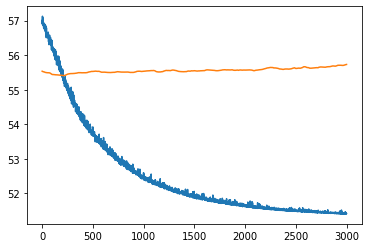

In [39]:
from keras import Sequential
from keras.layers import LSTM, Dense, InputLayer

model = Sequential()
model.add(InputLayer(input_shape=(max_length, n_features)))
model.add(LSTM(units=16, dropout=0.2))
model.add(Dense(n_features, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')
h = model.fit(X, y, validation_split=0.2, epochs=3000, verbose=1)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()

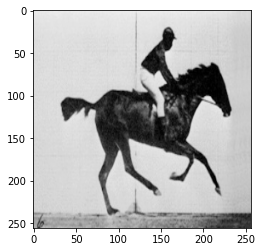

In [57]:
test_image = cv2.imread(directory + '/' + os.listdir(directory)[0])
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (height, width))
plt.imshow(test_image)
plt.show()

In [58]:
import tensorflow as tf

In [59]:
pred = convolution_model.predict(np.array([test_image]))
pred = pca.transform(pred)
# pred = tf.linalg.n normalize(pred)
pred = np.array([pad_seq(pred, max_length)])

In [60]:
pred

array([[[   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ,    0.        ,    0.        ,
            0.        ,    0.        ],
        [   

In [61]:
from sklearn.metrics import mean_squared_error

[57.40624158 56.98899235 44.7199204  54.44116138 57.09406451 59.90207581
 54.42406579 66.45530943 58.68611423 58.71994085 56.08019607 59.24825231
 64.12694498 49.9053198  50.31725367]
frame_03_delay-0.1s.jpg


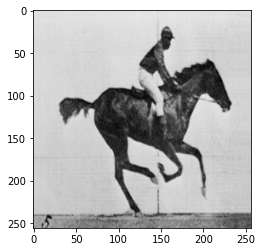

In [62]:
pred = model.predict(pred)

scores = np.empty(0)

for i in range(0, len(decomposed_array)):
    scores = np.append(scores, mean_squared_error(decomposed_array[i], pred[0]))
print(scores)
ims_pics = os.listdir(directory)
index = np.argmin(scores)
image = cv2.imread(directory + '/' + ims_pics[index])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (height, width))
print(ims_pics[index])
plt.imshow(image)
plt.show()

In [63]:
os.listdir(directory)

array([[[[0.87058824, 0.87058824, 0.87058824],
         [0.87843137, 0.87843137, 0.87843137],
         [0.8745098 , 0.8745098 , 0.8745098 ],
         ...,
         [0.84705882, 0.84705882, 0.84705882],
         [0.85098039, 0.85098039, 0.85098039],
         [0.84313725, 0.84313725, 0.84313725]],

        [[0.90588235, 0.90588235, 0.90588235],
         [0.90588235, 0.90588235, 0.90588235],
         [0.90196078, 0.90196078, 0.90196078],
         ...,
         [0.84705882, 0.84705882, 0.84705882],
         [0.85098039, 0.85098039, 0.85098039],
         [0.84313725, 0.84313725, 0.84313725]],

        [[0.92156863, 0.92156863, 0.92156863],
         [0.91764706, 0.91764706, 0.91764706],
         [0.90980392, 0.90980392, 0.90980392],
         ...,
         [0.84705882, 0.84705882, 0.84705882],
         [0.85098039, 0.85098039, 0.85098039],
         [0.84313725, 0.84313725, 0.84313725]],

        ...,

        [[0.65882353, 0.65882353, 0.65882353],
         [0.6745098 , 0.6745098 , 0.6745098 ]

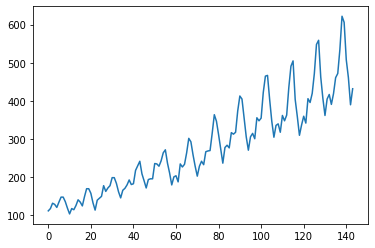

In [2]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [3]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [4]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [5]:
# load the dataset
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [83]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [122]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [123]:
# for i,j in zip(trainX, trainY):
#     print(i,j)

In [124]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [125]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 5)                 140       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0417
Epoch 2/100
 - 0s - loss: 0.0203
Epoch 3/100
 - 0s - loss: 0.0157
Epoch 4/100
 - 0s - loss: 0.0143
Epoch 5/100
 - 0s - loss: 0.0133
Epoch 6/100
 - 0s - loss: 0.0124
Epoch 7/100
 - 0s - loss: 0.0115
Epoch 8/100
 - 0s - loss: 0.0105
Epoch 9/100
 - 0s - loss: 0.0096
Epoch 10/100
 - 0s - loss: 0.0086
Epoch 11/100
 - 0s - loss: 0.0077
Epoch 12/100
 - 0s - loss: 0.0069
Epoch 13/100
 - 0s - loss: 0.0060
Epoch 14/100
 - 0s - loss: 0.0054
Epoch 15/100
 - 0s - loss: 0.0046
Epoch 16/100
 - 0s - loss: 0.0040
Epoch 17/100
 - 0s - loss: 0.0035
Epoch 18/100
 - 0s - loss: 0.0031
Epoch 19/100
 - 0s - loss: 0.0028
Epoch 20/100
 - 0s - loss: 0.0025
Epoch 21/100
 - 0s - loss: 0.0024
Epoch 22/100
 - 0s - loss: 0.0023
Epoch 23/100
 - 0s - loss: 0.0022
Epoch 24/100
 - 0s - loss: 0.0021
Epoch 25/100
 - 0s - loss: 0.0021
Epoch 26/100
 - 0s - loss: 0.0021
Epoch 27/100
 - 0s - loss: 0.0021
Epoch 28/100
 - 0s - loss: 0.0021
Epoch 29/100
 - 0s - loss: 0.0021
Epoch 30/100
 - 0s - lo

In [108]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 19.27 RMSE
Test Score: 44.85 RMSE


In [109]:
testX[0]

array([[0.4073359 , 0.3803089 , 0.48648646, 0.47104248, 0.484556  ,
        0.6138996 , 0.6969112 , 0.70077217, 0.57915056, 0.46911195]],
      dtype=float32)

In [110]:
model.predict(testX).shape

(37, 1)

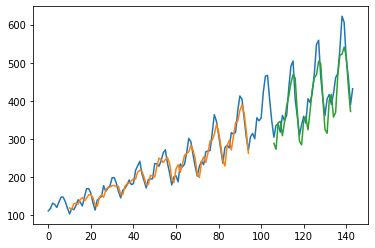

In [111]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

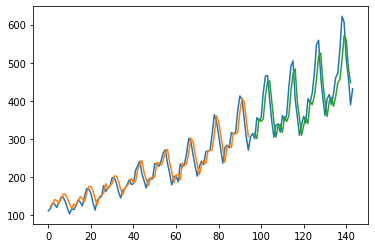

In [14]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=300, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

Train on 950 samples, validate on 50 samples
Epoch 1/300


KeyboardInterrupt: 